# Projeto Final IA006 2019.1
#### Samuel Gomes

### Dados

In [1]:
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data_train = pd.read_csv('poker-hand-training-true.data', header=None, names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','jogo'])
data_train2 = pd.read_csv('poker-hand-training-true.data', header=None, names=['N1','V1','N2','V2','N3','V3','N4','V4','N5','V5','jogo'])
data_test = pd.read_csv('poker-hand-testing.data', header=None, names=['S1','C1','S2','C2','S3','C3','S4','C4','S5','C5','jogo'])

print('Training Data')
print('Shape:',data_train.shape)
print(data_train.head())

print('Test Data')
print('Shape:',data_test.shape)
print(data_test.head())

# Dados originais com 0s e 1s (conjunto de treinamento)
data01_train_labels = data_train.jogo # labels
data01_train = data_train.drop(['jogo'],axis=1)

# Dados originais com 0s e 1s (conjunto deteste)
data01_test_labels = data_test.jogo # labels
data01_test = data_test.drop(['jogo'],axis=1)

Training Data
Shape: (25010, 11)
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  jogo
0   1  10   1  11   1  13   1  12   1   1     9
1   2  11   2  13   2  10   2  12   2   1     9
2   3  12   3  11   3  13   3  10   3   1     9
3   4  10   4  11   4   1   4  13   4  12     9
4   4   1   4  13   4  12   4  11   4  10     9
Test Data
Shape: (1000000, 11)
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  jogo
0   1   1   1  13   2   4   2   3   1  12     0
1   3  12   3   2   3  11   4   5   2   5     1
2   1   9   4   6   1   4   3   2   3   9     1
3   1   4   3  13   2  13   2   1   3   6     1
4   3  10   2   7   1   2   2  11   4   9     0


In [2]:
data_train2.head()

,N1,V1,N2,V2,N3,V3,N4,V4,N5,V5,jogo
0,1,10,1,11,1,13,1,12,1,1,9
1,2,11,2,13,2,10,2,12,2,1,9
2,3,12,3,11,3,13,3,10,3,1,9
3,4,10,4,11,4,1,4,13,4,12,9
4,4,1,4,13,4,12,4,11,4,10,9


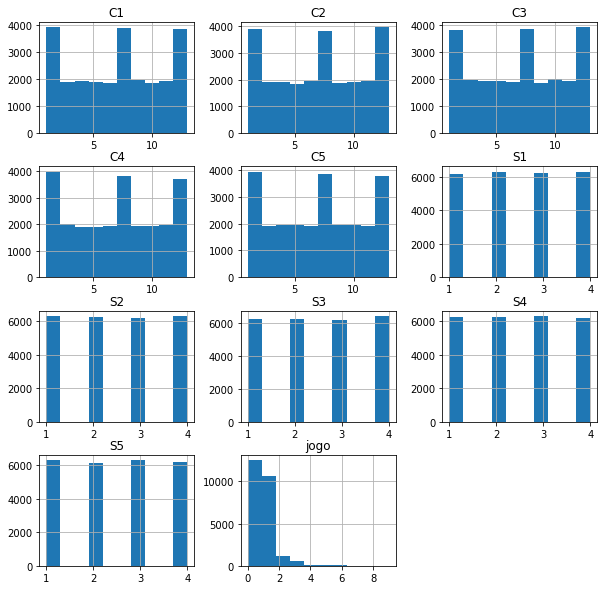

In [3]:
data_train.hist(figsize=(10,10))
plt.show()

### Dados Cru (Sem 0s e 1s)

In [4]:
print('Training Data')
data_raw = data_train[data_train['jogo'] != 0]
data_raw = data_raw[data_train['jogo'] != 1]
data_raw = data_raw.reset_index(drop=True)
print(data_raw.shape)
print(data_raw.head())
X_raw = data_raw.drop(['jogo'],axis=1)
y_raw = data_raw.jogo
print()
print('Test Data')
data_raw_test = data_test[data_test['jogo'] != 0]
data_raw_test = data_raw_test[data_test['jogo'] != 1]
data_raw_test = data_raw_test.reset_index(drop=True)
print(data_raw_test.shape)
print(data_raw_test.head())
X_raw_test = data_raw_test.drop(['jogo'],axis=1)
y_raw_test = data_raw_test.jogo

Training Data
(1918, 11)
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  jogo
0   1  10   1  11   1  13   1  12   1   1     9
1   2  11   2  13   2  10   2  12   2   1     9
2   3  12   3  11   3  13   3  10   3   1     9
3   4  10   4  11   4   1   4  13   4  12     9
4   4   1   4  13   4  12   4  11   4  10     9

Test Data
(76293, 11)
   S1  C1  S2  C2  S3  C3  S4  C4  S5  C5  jogo
0   4   8   1   3   2   3   2   2   2   8     2
1   1   9   1   6   4   5   3   5   1   5     3
2   2  12   3  12   3   7   3  11   2   7     2
3   1   9   3   7   2   9   4   9   2   4     3
4   3  10   3   6   1  10   1   6   2   9     2


C:\Users\Samuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Samuel\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


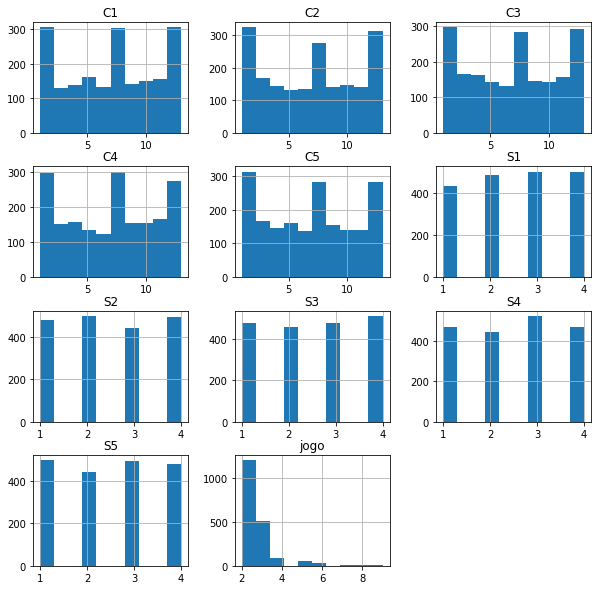

In [5]:
data_raw.hist(figsize=(10,10))
plt.show()

### Dados Codificados (Com 0s e 1s)

In [6]:
from functools import partial
def encode_poker_hand_data(poker_hands):
    # encode data using one hot encoding
    
    # inner function to expand ordinals into a series of 0's and one 1
    def encode(x, n):
        out = [0] * n
        out[x] = 1

        return out

    # dataset uses numbers 1-4 and 1-13 identify cards. Change to start at zero
    poker_hands.iloc[:, :-1] -= 1

    # encode suits (0-3)
    temp = poker_hands['S1,S2,S3,S4,S5'.split(',')].applymap(partial(encode, n=4)).itertuples(index=False)
    encoded_suits = pd.DataFrame([[x for g in r for x in g] for r in temp])

    # encode ranks (0-12)
    temp = poker_hands['C1,C2,C3,C4,C5'.split(',')].applymap(partial(encode, n=13)).itertuples(index=False)
    encoded_ranks = pd.DataFrame([[x for g in r for x in g] for r in temp])

    # put them all together. order is irrelevant
    encoded_data = pd.concat([encoded_suits, encoded_ranks], axis=1)
    encoded_data.columns = range(encoded_data.shape[1])

    # encode hand classifications (0-9)
    encoded_classifications = pd.DataFrame([x for x in poker_hands['jogo'].apply(partial(encode, n=10))])
    
    # shuffle data
    random_index = np.random.permutation(encoded_data.shape[0])
    encoded_data = encoded_data.iloc[random_index].reset_index(drop=True)
    encoded_classifications = encoded_classifications.iloc[random_index].reset_index(drop=True)
    
    return encoded_data, encoded_classifications

np.random.seed(42)

# Dados codificados COM 0s e 1s
data_cod, data_cod_labels = encode_poker_hand_data(data_train)
data_cod_test, data_cod_test_labels = encode_poker_hand_data(data_test)

# Dados codificados SEM 0s e 1s
#data_cod, data_cod_labels = encode_poker_hand_data(X_raw)
#data_cod_test, data_cod_test_labels = encode_poker_hand_data(X_raw_test)

print('shape train:',data_cod.shape)
print('shape test:',data_cod_test.shape)

shape train: (25010, 85)
shape test: (1000000, 85)


### MLP - DB Cru



In [7]:
np.unique(y_raw)

array([2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [8]:
print(X_raw.shape)


(1918, 10)


Acurácia (teste): 0.683626


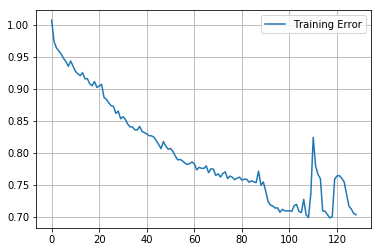

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix


mlp = MLPClassifier(hidden_layer_sizes=(52,26), 
                    verbose=False, activation='tanh', learning_rate_init=0.01, max_iter=1000, solver='adam')

mlp.fit(data01_train, data01_train_labels) # Dados originais

pred_test = mlp.predict(data01_test)


# Confusion Matrix
cm = confusion_matrix(data01_test_labels, pred_test)

# Acurácia

print('Acurácia (teste):',accuracy_score(data01_test_labels, pred_test))



pd.DataFrame(mlp.loss_curve_).plot()
plt.legend(('Training Error',))
plt.grid(True)
plt.show()

In [10]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=mlp, X=data01_train, y=data01_train_labels, cv=5)
max(all_accuracies)

0.9928043174095542

### MLP - DB Cru Sem 0s e 1s

Acurácia (teste): 0.5771958108869752


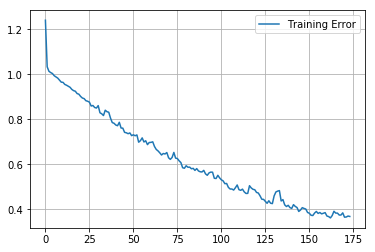

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix

scores = ['precision', 'recall']

#X_train, X_test, y_train, y_test = train_test_split(kappa_x, kappa_y, test_size=0.3, random_state=42)
#X_train = data_train.copy()
#y_train = data_train_labels.copy()
# scaler = StandardScaler()
# scaler.fit(X_raw)
# X_raw = scaler.transform(X_raw)
#X_test = scaler.transform(X_val)


mlp2 = MLPClassifier(hidden_layer_sizes=(52,26), 
                    verbose=False, activation='tanh', learning_rate_init=0.01, max_iter=1000, solver='adam')

mlp2.fit(X_raw, y_raw)

pred_test2 = mlp2.predict(X_raw_test)


# Confusion Matrix
cm2 = confusion_matrix(y_raw_test, pred_test2)

# Acurácia

print('Acurácia (teste):',accuracy_score(y_raw_test, pred_test2))
# F1-Score
#print('F1-Score:', f1_score(y_test, predictions, average='macro'))



pd.DataFrame(mlp2.loss_curve_).plot()
plt.legend(('Training Error',))
plt.grid(True)
plt.show()

In [12]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=mlp2, X=X_raw, y=y_raw, cv=5)
max(all_accuracies)

0.599483204134367

### MLP - DB Codificado

Acurácia (teste): 0.97223


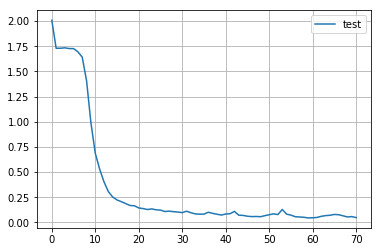

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix

scores = ['precision', 'recall']

#X_train, X_test, y_train, y_test = train_test_split(kappa_x, kappa_y, test_size=0.3, random_state=42)
#X_train = data_train.copy()
#y_train = data_train_labels.copy()
#scaler = StandardScaler()
#scaler.fit(X_train, X_val)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_val)


mlp3 = MLPClassifier(hidden_layer_sizes=(52,26), 
                    verbose=False, random_state=42, activation='tanh', learning_rate_init=0.01, max_iter=1000, solver='adam')

mlp3.fit(data_cod, data_cod_labels)

pred_test3 = mlp3.predict(data_cod_test)


# Confusion Matrix
#cm = confusion_matrix(data_cod_test_labels, pred_test3)

# Acurácia

print('Acurácia (teste):',accuracy_score(data_cod_test_labels, pred_test3))
# F1-Score
#print('F1-Score:', f1_score(y_test, predictions, average='macro'))



pd.DataFrame(mlp3.loss_curve_).plot()
plt.legend(('test',))
plt.grid(True)
plt.show()

In [14]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=mlp3, X=data_cod, y=data_cod_labels, cv=5)
max(all_accuracies)

0.9618152738904439

### MLP com DB Full + *Holdout*

Acurácia (teste): 0.9968536892323002


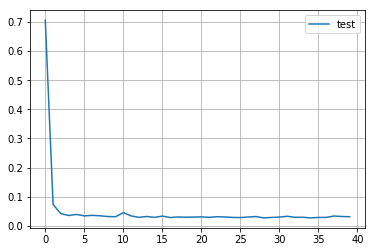

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix

a = data01_train.copy()
b = data01_train_labels.copy()

a2 = data01_test.copy()
b2 = data01_test_labels.copy()

data_full = pd.concat([a, a2])
data_full_labels = pd.concat([b, b2])

data_full_train, data_full_test, data_full_train_labels, data_full_test_labels = train_test_split(data_full, data_full_labels, test_size=0.4, random_state=42)

mlp4 = MLPClassifier(hidden_layer_sizes=(52,26), 
                    verbose=False, random_state=42, activation='tanh', learning_rate_init=0.01, max_iter=1000, solver='adam')

mlp4.fit(data_full_train, data_full_train_labels) # treino
pred_test4 = mlp4.predict(data_full_test) # predição

print('Acurácia (teste):',accuracy_score(data_full_test_labels, pred_test4))

pd.DataFrame(mlp4.loss_curve_).plot()
plt.legend(('test',))
plt.grid(True)
plt.show()

In [16]:
data_full_test.shape

(410004, 10)

In [17]:
from sklearn.model_selection import cross_val_score  
all_accuracies = cross_val_score(estimator=mlp4, X=data_cod, y=data_cod_labels, cv=5)
max(all_accuracies)

0.9618152738904439

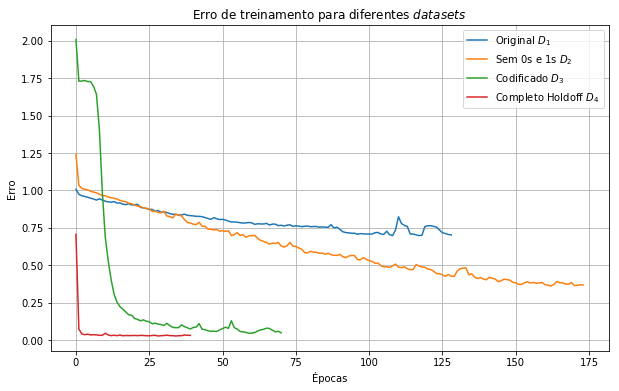

In [18]:
plt.figure(figsize=(10,6))
plt.plot(pd.DataFrame(mlp.loss_curve_))
plt.plot(pd.DataFrame(mlp2.loss_curve_))
plt.plot(pd.DataFrame(mlp3.loss_curve_))
plt.plot(pd.DataFrame(mlp4.loss_curve_))
plt.legend(('Original $D_1$', 'Sem 0s e 1s $D_2$', 'Codificado $D_3$', 'Completo Holdoff $D_4$'))
plt.title('Erro de treinamento para diferentes $datasets$')
plt.xlabel('Épocas')
plt.ylabel('Erro')
plt.grid(True)
plt.show()

In [19]:
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.neural_network import MLPClassifier
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import classification_report
# from sklearn.metrics import f1_score, accuracy_score, roc_auc_score, confusion_matrix

# tuned_parameters = [{'activation': ['relu'], 'learning_rate_init': [0.1, 0.001, 0.0001],
#                      'hidden_layer_sizes': [(10,10,10,10,8), (20,20,20,20,8), (52,25,10)]}]
#                     #{'activation': ['relu'], 'learning_rate_init': [0.1, 0.01, 0.001]}]


# scores = ['accuracy', 'f1']

# #X_train, X_val, y_train, y_val = train_test_split(data_train, data_train_labels, test_size=0.3, random_state=42)
# #X_train = data_train.copy()
# #y_train = data_train_labels.copy()
# #scaler = StandardScaler()
# #scaler.fit(X_train, X_val)
# #X_train = scaler.transform(X_train)
# #X_test = scaler.transform(X_val)

# for score in scores:
#     print("# Tuning hyper-parameters for %s" % score)
#     print()
    
#     mlp2 = MLPClassifier(verbose=False, random_state=42)
    
#     clf = GridSearchCV(mlp2, tuned_parameters, cv=3)
#     clf.fit(train_X, train_Y)
    
#     print("Best parameters set found on development set:")
#     print()
#     print(clf.best_params_)
#     print()
#     print("Grid scores on development set:")
#     print()
#     means = clf.cv_results_['mean_test_score']
#     stds = clf.cv_results_['std_test_score']
#     for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#         print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))
#         print()
        
#     print("Detailed classification report:")
#     print()
#     print("The model is trained on the full development set.")
#     print("The scores are computed on the full evaluation set.")
#     print()
#     y_true, y_pred = y_val, clf.predict(X_val)
#     print(classification_report(y_true, y_pred))
#     print()



### MLP (85 - 52 - 26 - 10) Matriz de confusão

In [20]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(20, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('Valores Reais')
    plt.xlabel('Valores preditos\nAcurácia={:0.4f}; Erro={:0.4f}'.format(accuracy, misclass))
    plt.show()

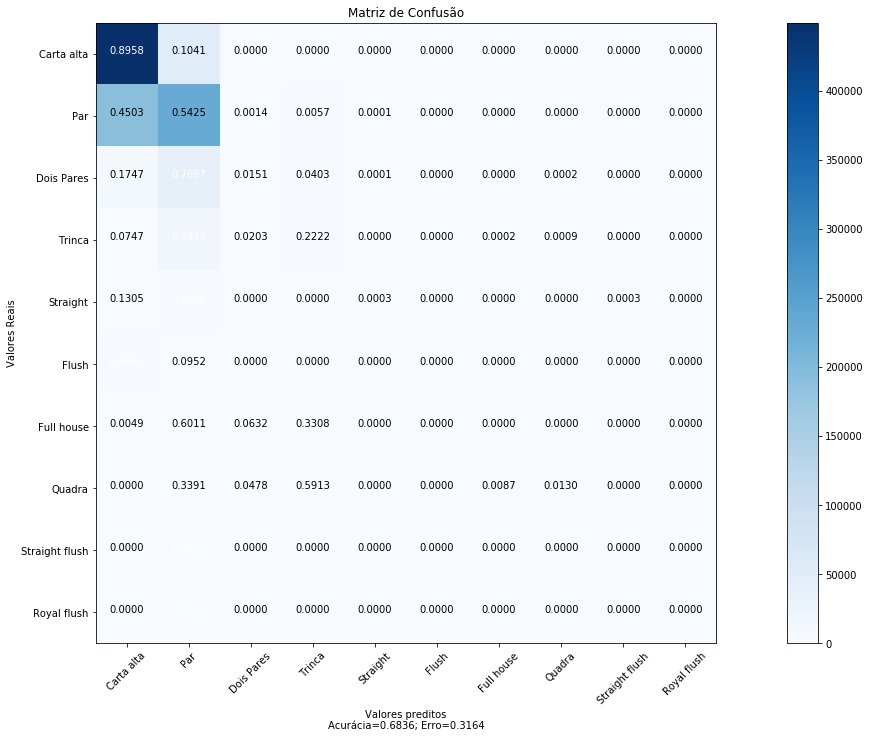

In [21]:
plot_confusion_matrix(cm, target_names=['Carta alta', 'Par', 'Dois Pares', 'Trinca', 'Straight', 'Flush', 'Full house', 'Quadra', 'Straight flush', 'Royal flush'], normalize=True, title='Matriz de Confusão')

### SVMs

In [22]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
svc = svm.SVC(gamma="scale")
#svm = SVC(kernel='linear', C = 1, gamma = 'auto', verbose=1)
clf = GridSearchCV(svc, param_grid, cv=5, verbose=True)
clf.fit(X_raw, y_raw)


svm_predicts = clf.predict(X_raw_test)
svm_acc = accuracy_score(y_raw_test, svm_predicts)
svm_acc

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  7.0min finished


0.633282214619952

In [23]:
clf.best_estimator_

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### SVM - RBF

In [24]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svm2 = SVC(kernel='rbf', C = 1, gamma = 'auto', verbose=1)
svm2.fit(X_raw, y_raw)


svm2_predicts = svm2.predict(X_raw_test)
svm2_acc = accuracy_score(y_raw_test, svm2_predicts)
svm2_acc

[LibSVM]

0.6271610763766008

In [25]:
from sklearn.model_selection import cross_val_score  
all_accuracies2 = cross_val_score(estimator=svm2, X=X_raw, y=y_raw, cv=5)
all_accuracies2

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

array([0.62790698, 0.62239583, 0.625     , 0.63089005, 0.62992126])

### SVM - DB Codificado

In [26]:
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# svm3 = SVC(kernel='rbf', C = 1, gamma = 'auto', verbose=1)
# svm3.fit(data_cod, data_cod_labels)


# svm3_predicts = svm.predict(data_cod_test)
# svm3_acc = accuracy_score(data_cod_test_labels, svm3_predicts)
# svm3_acc

In [27]:
# from sklearn.model_selection import cross_val_score  
# all_accuracies3 = cross_val_score(estimator=svm3, X=data_cod, y=data_cod_labels, cv=5)
# all_accuracies3

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score  

print('-'*10,'KNN','-'*10)

# Dataset completo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(data01_train, data01_train_labels) # treinamento da rede
estimators_knn = cross_val_score(estimator=knn, X=data01_train, y=data01_train_labels, cv=5)
print('Menor erro de validação (DB Completo):',min(estimators_knn))

---------- KNN ----------
Menor erro de validação (DB Completo): 0.5268107242897159


In [29]:
data01_train.shape

(25010, 10)

In [30]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

tree_class = tree.DecisionTreeClassifier()
tree_class.fit(data01_train, data01_train_labels)
tree_predict = tree_class.predict(data01_test)
tree_acc = accuracy_score(tree_predict, data01_test_labels.values)
print('Acurácia:',tree_acc)

#classifier = DecisionTreeClassifier()
#classifier.fit(features, labels)
for name, importance in zip(data01_train.columns, tree_class.feature_importances_):
    print(name, importance)

Acurácia: 0.479915
S1 0.06592751089053815
C1 0.13799781655499108
S2 0.0396940835671969
C2 0.1427751301861546
S3 0.07285103488977798
C3 0.14602368040140384
S4 0.0748688726196515
C4 0.13995638654193812
S5 0.038010576590933536
C5 0.1418949077574143


In [31]:
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.multiclass import OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn import svm

models = [RandomForestClassifier(), AdaBoostClassifier(), 
          KNeighborsClassifier(),GaussianNB(),tree.DecisionTreeClassifier()]

model_names = ["Random Forest", "AdaBoost", "KNN","Naive Bayes","Árvore de Decisão"]

for model,name in zip(models,model_names):
    model.fit(data_full_train, data_full_train_labels)
    
    if name == "Random Forest":
        print(model.feature_importances_)   
    # predição
    prediction = model.predict(data_full_test)
    # acurácia
    acc = accuracy_score(data_full_test_labels, prediction)
    print("Accuracy Using",name,": " + str(acc)+'\n')
    print(classification_report(data_full_test_labels,prediction))
    print(confusion_matrix(data_full_test_labels, prediction))

C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.0589001  0.14200544 0.05606473 0.14576618 0.05619035 0.1437957
 0.05479787 0.14173371 0.04946192 0.15128399]
Accuracy Using Random Forest : 0.6653325333411382



C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.69      0.84      0.76    205174
           1       0.64      0.57      0.60    173606
           2       0.42      0.06      0.10     19461
           3       0.68      0.08      0.15      8657
           4       0.37      0.02      0.03      1594
           5       0.97      0.22      0.36       819
           6       0.40      0.01      0.02       586
           7       0.00      0.00      0.00        98
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3

   micro avg       0.67      0.67      0.67    410004
   macro avg       0.42      0.18      0.20    410004
weighted avg       0.65      0.67      0.64    410004

[[172669  32442     48      8      4      3      0      0      0      0]
 [ 74101  98106   1168    196     32      0      3      0      0      0]
 [  3166  15135   1073     81      4      0      2      0      0      0]
 [  1087   6646    190

C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.51      0.62      0.56    205174
           1       0.46      0.25      0.32    173606
           2       0.00      0.00      0.00     19461
           3       0.15      0.00      0.01      8657
           4       0.00      0.00      0.00      1594
           5       1.00      0.01      0.02       819
           6       0.00      0.00      0.00       586
           7       0.00      0.00      0.00        98
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3

   micro avg       0.41      0.41      0.41    410004
   macro avg       0.21      0.09      0.09    410004
weighted avg       0.46      0.41      0.42    410004

[[127047  41627      0      4      0      0      0      0  36043    453]
 [102981  42566      0     86      0      0      0      0  26936   1037]
 [ 11582   5001      0     44      0      0      0      0   2611    223]
 [  4913   2554      0

C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.65      0.75      0.69    205174
           1       0.56      0.54      0.55    173606
           2       0.32      0.07      0.11     19461
           3       0.28      0.04      0.07      8657
           4       0.24      0.03      0.06      1594
           5       0.17      0.00      0.00       819
           6       0.17      0.01      0.02       586
           7       0.00      0.00      0.00        98
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3

   micro avg       0.61      0.61      0.61    410004
   macro avg       0.24      0.14      0.15    410004
weighted avg       0.58      0.61      0.59    410004

[[153843  50994    300     27      6      4      0      0      0      0]
 [ 77459  93719   1771    540    112      1      4      0      0      0]
 [  5521  12331   1303    253     38      0     14      1      0      0]
 [   710   7201    400

C:\Users\Samuel\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

           0       0.50      1.00      0.67    205174
           1       0.00      0.00      0.00    173606
           2       0.00      0.00      0.00     19461
           3       0.00      0.00      0.00      8657
           4       0.00      0.00      0.00      1594
           5       0.00      0.00      0.00       819
           6       0.00      0.00      0.00       586
           7       0.00      0.00      0.00        98
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         3

   micro avg       0.50      0.50      0.50    410004
   macro avg       0.05      0.10      0.07    410004
weighted avg       0.25      0.50      0.33    410004

[[205174      0      0      0      0      0      0      0      0      0]
 [173606      0      0      0      0      0      0      0      0      0]
 [ 19461      0      0      0      0      0      0      0      0      0]
 [  8657      0      0

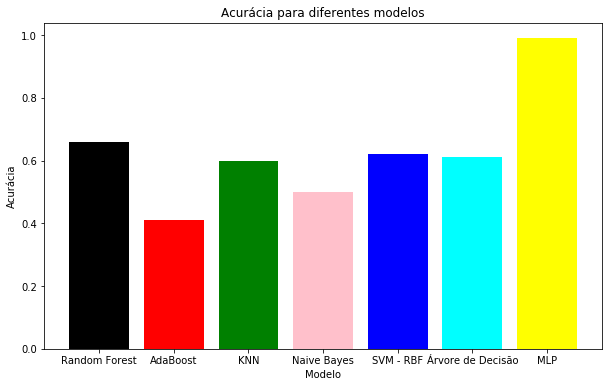

In [47]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
height = [0.66, 0.41, 0.60, 0.50, 0.62, 0.61, 0.99]
bars = ("Random Forest", "AdaBoost", "KNN","Naive Bayes","SVM - RBF", "Árvore de Decisão", "MLP")
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, height, color=['black', 'red', 'green', 'pink', 'blue', 'cyan', 'yellow'])

# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title('Acurácia para diferentes modelos')
plt.xlabel('Modelo')
plt.ylabel('Acurácia')
# Show graphic
plt.show()
